# A/B testing analysis on advertising dataset to make a hypothesis to decide wheather females click on ads more than males or not.
### There's a little data visualization done too.

Importing libraries and displaying dataset:

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats 
from scipy.stats import chi2_contingency, beta
from scipy.stats import norm
from scipy.stats import t

In [4]:
df = pd.read_csv('advertising.csv')

In [48]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


Ensuring there is no null data and displaying some statistical details of the data:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [15]:
df.shape

(1000, 10)

### Firstly, we will see number of males and females who clicked on Ad to see if it supports our assumption.

In [78]:
df[df['Male']==1][df['Clicked on Ad']==1]['Clicked on Ad'].count()


C:\Users\Mido\AppData\Local\Temp\ipykernel_13020\1709625504.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Male']==1][df['Clicked on Ad']==1]['Clicked on Ad'].count()


231

In [79]:
df[df['Male']==0][df['Clicked on Ad']==1]['Clicked on Ad'].count()


C:\Users\Mido\AppData\Local\Temp\ipykernel_13020\3986011157.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Male']==0][df['Clicked on Ad']==1]['Clicked on Ad'].count()


269

<Axes: xlabel='Male', ylabel='count'>

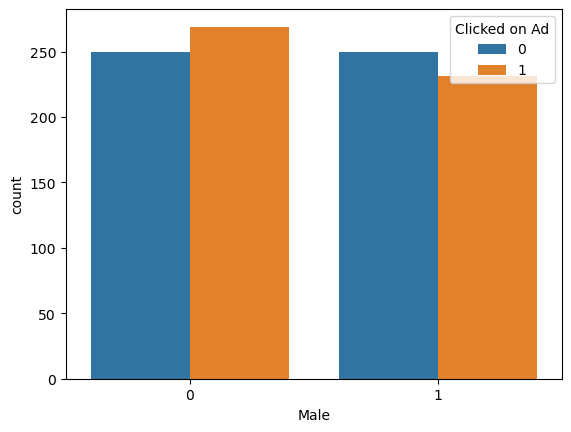

In [80]:
sns.countplot(data=df,x='Male',hue='Clicked on Ad')

It may slightly supports the assumption.

Grouping male and female columns from the original dataframe:

In [33]:
#subset the original dataframe
male=df[df['Male']==1]
female=df[df['Male']==0]


#find the average clicked on Ad rate of each group
malead=male['Clicked on Ad'].mean()
femalead=female['Clicked on Ad'].mean()

print(malead,femalead)

0.4802494802494803 0.5183044315992292


# A/B Analysis

Sampling the male data:

<Axes: ylabel='Density'>

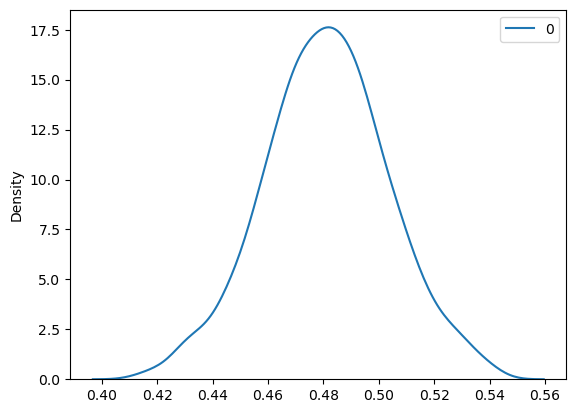

In [39]:
#create an empty list to store bootstrapped means
boot_male=[]

#Set up a loop that will iterate 1000 times. In each iteration, a new bootstrapped sample will be generated
for i in range (1000):
    boot_mean=male.sample(frac=1,replace=True)['Clicked on Ad'].mean()
    boot_male.append(boot_mean)

boot_male=pd.DataFrame(boot_male)

#Create a kde plot of the bootstrapped means
sns.kdeplot(boot_male)

Sampling the female data:

<Axes: ylabel='Density'>

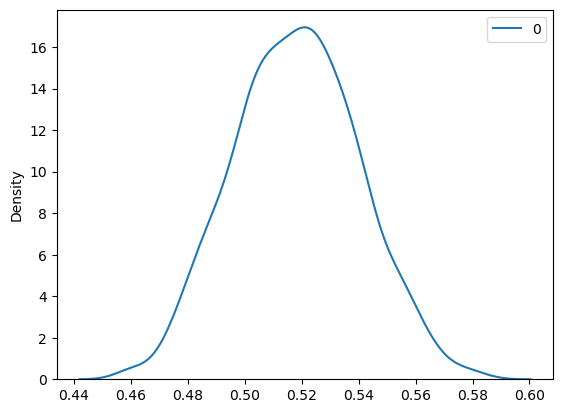

In [41]:

boot_female=[]


for i in range (1000):
    boot_mean=female.sample(frac=1,replace=True)['Clicked on Ad'].mean()
    boot_female.append(boot_mean)

boot_female=pd.DataFrame(boot_female)

sns.kdeplot(boot_female)

Since both groups shows a kde plot which follows a normal distribution, then we can do a hypthesis test by running z-test,t-test and chi-square test.

# Null hypothesis: Males click on ads more than females.
# Alternative hypothesis: Females click on ads more than males.

# 1- Z-Test:

In [87]:
alpha = 0.05

adm=male['Clicked on Ad']
adf=female['Clicked on Ad']

adm_mean=adm.mean()
adf_mean=adf.mean()
adm_std=adm.std()
adf_std=adf.std()

pooled_std=np.sqrt((adf_std**2+adm_std**2)/2)
z_score=(adf_mean-adm_mean)/pooled_std
p_value=1-stats.norm.cdf(z_score)
critical_value = norm.ppf(1 - alpha / 2)
print('z score:',z_score)
print('P Value:',p_value)
print('critical value:',critical_value)

z score: 0.07608883934862702
P Value: 0.46967420965494044
critical value: 1.959963984540054


## Conclusion:
#### Failed to reject the null hypothesis. There is no significant difference  between the two groups as the critical value is the greatest. 

# 2- T-test

In [98]:
alpha = 0.05
t_stat, p_value = stats.ttest_ind(adf, adm, alternative='greater', equal_var=False)
critical_values = t.ppf(1 - alpha / 2, 2000)
print("T-statistic:", t_stat)
print("P-value:", p_value)
print('critical value:',critical_values)

T-statistic: 1.202202029513623
P-value: 0.11478604063419551
critical value: 1.9611508260994375


## Conclusion:
#### Failed to reject the null hypothesis. There is no significant difference  between the two groups as the critical value is the greatest. 

# 3- Chi-square test

In [82]:
cadm=adm.sum()
cadf=adf.sum()
xadm=adm.count()- cadm
xadf=adf.count()- cadf

contingency_table = np.array([[cadf, xadf],[cadm, xadm]])
chi, p_value, _, _ = chi2_contingency(contingency_table, correction=False)


print('chi:',chi,'   p_value:',p_value)

chi: 1.4460881512904635    p_value: 0.22915668038050327


## Conclusion:
#### Failed to reject the null hypothesis. The p value is greater than 0.05.